# Comp 767: MDP Assignment (Feb. 5th 2018)

## Bellman Optimality Equations
To show that there exists a solution to the Bellman Optimality equations we must show that the Bellman optimality operator is a contraction mapping. It then follows, by the **contraction mapping theorem** that the operator converges to a unique fixed point. 

We begin by defining our operator $B$ as the Bellman optimality equation:

$$
B(v) = \max_{a\in A} (R^a + \gamma P^a v)
$$

$B$ is a contraction mapping if, for all value functions $u, v$ and some $0 \leq \gamma < 1$, 

$$
||B(u) - B(v)||_{\infty} \leq \gamma || u-v||_{\infty}
$$

Proof:
$$
\begin{aligned}
||B(u) - B(v)||_{\infty} &= || \max_{a\in A} (R^a + \gamma P^a u) - \max_{a\in A} (R^a + \gamma P^a v) ||_{\infty}
\\\\
&\leq || \max_{a \in A}((R^a + \gamma P^a u) - (R^a + \gamma P^a v)) ||_{\infty}
\\\\
&= ||\max_{a \in A}(\gamma P^a (u-v))||_{\infty}
\\\\
&\leq || \max_{a \in A} \gamma (u-v) ||_{\infty} 
\\\\
&= ||\gamma (u-v)||_{\infty} = \gamma || u-v ||_{\infty}
\end{aligned}
$$

B is a contraction mapping $\implies$ B converges to a unique fixed point (a unique value function) $\implies$ there exists a solution to the Bellman optimality equation.

## Policy Iteration 
In policy iteration, we begin with some deterministic policy $\pi$ at iteration $k$. Once the the policy is evaluated, we improve our policy by acting greedily over every state in the system for a single step:

$$
\pi^\prime(s) = \underset{a\in A}{\operatorname{argmax}}q(s,a)
$$

This improves our value function over a single step for all $s \in S$, then follows the previous policy $\pi$ for all subsequent steps.

$$
q_\pi(s, \pi^\prime(s)) \geq q_\pi(s,\pi(s)) \\
\max_{a\in A} q_\pi(s,a) \geq V_\pi(s)
$$


Would we have even further improved the value function if we did this for all subsequent steps? 

$$
\begin{aligned}
V_\pi(s) &\leq q_\pi(s,\pi^\prime(s)) = \mathbb{E}_{\pi^\prime}[R_{t+1} + \gamma V_\pi(S_{t+1}) |S_t = s]\\
&\leq \mathbb{E}_{\pi^\prime}[R_{t+1} + \gamma q_\pi(S_{t+1}, \pi^\prime(S_{t+1}))|S_t = s]\\
&\leq \mathbb{E}_{\pi^\prime}[R_{t+1} + \gamma R_{t+2} + \gamma^2 q_\pi(S_{t+2}, \pi^\prime(S_{t+2}))|S_t = s]\\
&\leq \mathbb{E}_{\pi^\prime}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 q_\pi(S_{t+3}, \pi^\prime(S_{t+3}))|S_t = s]\\
&\leq \mathbb{E}_{\pi^\prime}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + ...|S_t = s] = V_{\pi^\prime}(s)
\end{aligned}
$$

Policy iteration will select the greedy policy after each policy evaluation, which corresponds to exactly what was shown above. Therefore, we have shown that for two successive policies of policy iteration, the value subsequent value function is always greater than or equal to the previous, that is $V_\pi(s) \leq V_{\pi^\prime}(s)$ for all $s \in S$.

Since policy iteration improves at each step (or terminates when policy no longer changes) and we know that there exists an optimal policy (theorem: for any MDP, there exists an optimal policy that is better than or equal to all other policies), then it is impossible for the policy to become infinitely better and must converge to the optimal solution in a finite number of steps. 

To show this, consider the point where policy improvement stops:

$$
q_\pi(s,\pi^\prime(s)) = \max_{a\in A} q(s,a) = q_\pi(s,\pi(s)) = v_\pi(s)
$$

At this point, the Bellman optimality equation has been satisfied as the value function is no longer increasing. 

We showed in Question 1 that the Bellman optimality equation has a unique fixed point, that is a single value function that is mapped to itself by the Bellman optimality equation. We also discussed that the value function cannot become infinitely better given that there exists an optimal solution and must converge to a single value function in a finite number of steps.

Therefore, upon termination $V_\pi(s) = V_*(s)$ for all $s \in S$, which implies that upon termination $\pi$ is an optimal policy.

## Track 1

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

## *2-state environment*
Policies are read as follows:
- Rows represent possible states in the system ${s_0, s_1}$.
- Columns represent actions ${a_0, a_1, a_2}$

In [2]:
class two_state_environment:
    def __init__(self):
        self.nS = 2
        self.nA = 3
        self.P = {
                # States
                0:{
                        # Actions, (prob, next_state, reward)
                        0: [(0.5, 0, 5), (0.5, 1, 5)],
                        1: [(0,0,0),(1, 1, 10)],
                        2: [(1,0,-1e9),(0,0,0)]},

                1:{
                        0:[(1,0,-1e9),(0,0,0)],
                        1:[(1,0,-1e9),(0,0,0)],
                        2:[(0,0,0),(1, 1, -1)]}
        }

In [4]:
def one_step_lookahead(environment, state, V, discount_factor):
    ''' Return action_values at current state for given value function. '''
    action_values = np.zeros(environment.nA)
    for action in range(environment.nA):
            for probability, next_state, reward in env.P[state][action]:
                    action_values[action] += probability * (reward + discount_factor * V[next_state])
    return action_values

In [5]:
def policy_evaluation(policy, environment, discount_factor=0.95, theta=1e-12, max_iter=1e5, modified=False):
    ''' Evaluate a given policy at every state and return the value function over all states. '''
    evaluation_iterations = 1
    V = np.zeros(environment.nS)

    for i in range(int(max_iter)):
            delta = 0
            for state in range(environment.nS):
                    v = 0
                    for action, action_prob in enumerate(policy[state]):
                            for state_prob, next_state, reward in environment.P[state][action]:
                                    v += action_prob * state_prob * (reward+discount_factor*V[next_state])
                    delta = max(delta, np.abs(V[state] - v))
                    V[state] = v
                    if modified:
                            if delta < theta:
                                    print(f'\tPolicy evaluated in {evaluation_iterations} iterations')
                                    return V
    return V

def policy_iteration(environment, discount_factor=0.95, max_iter=1e5, modified=False):
    # Perform policy iteration and return policy along with value function

    # Uniform random policy
    policy = np.ones([environment.nS, environment.nA]) / environment.nA
    evaluated_policies = 1

    for i in range(int(max_iter)):
            stable_policy = True
            V = policy_evaluation(policy, environment, discount_factor=discount_factor, modified=modified)
            for state in range(environment.nS):
                    current_action = np.argmax(policy[state])
                    action_values = one_step_lookahead(environment, state, V, discount_factor)
                    best_action = np.argmax(action_values)
                    #print(f'State {state}:: Current_action, action_values, best_action:\n',current_action, action_values, best_action, '\n')
                    if current_action != best_action:
                            stable_policy = True
                    policy[state] = np.eye(environment.nA)[best_action]
            evaluated_policies+=1

            if stable_policy:
                    print(f'Evaluated {evaluated_policies} policies.')
                    return policy, V

In [6]:
def value_iteration(environment, discount_factor=0.95, theta=1e-9, max_iterations=1e5):
    V = np.zeros(environment.nS)
    for i in range(int(max_iterations)):
            delta = 0
            for state in range(environment.nS):
                    action_value = one_step_lookahead(environment, state, V, discount_factor)
                    best_action_value = np.max(action_value)
                    delta = max(delta, np.abs(V[state] - best_action_value))
                    V[state] = best_action_value

            if delta < theta:
                    print(f'Value iteration converged at iteration #{i}')
                    break

    policy = np.zeros([environment.nS, environment.nA])

    for state in range(environment.nS):
            action_value = one_step_lookahead(environment, state, V, discount_factor)
            best_action = np.argmax(action_value)
            policy[state, best_action] = 1.0

    return policy, V

In [7]:
# 2-state environment
env = two_state_environment()

In [8]:
print('Policy Iteration:')
policy, V = policy_iteration(env, discount_factor=0.95, modified=False)
print('\nOptimal policy:\n', policy)
print('\nFinal value function', V)

Policy Iteration:
Evaluated 2 policies.

Optimal policy:
 [[ 1.  0.  0.]
 [ 0.  0.  1.]]

Final value function [ -9.40047956e+09  -9.68824935e+09]


In [9]:
print('Modified Policy Iteration:')
policy, V = policy_iteration(env, discount_factor=0.95, modified=True)
print('\nOptimal policy:\n', policy)
print('\nFinal value function', V)

Modified Policy Iteration:
	Policy evaluated in 1 iterations
Evaluated 2 policies.

Optimal policy:
 [[ 1.  0.  0.]
 [ 0.  0.  1.]]

Final value function [ -9.40047956e+09  -9.68824935e+09]


In [10]:
print('Value Iteration')
policy, V = value_iteration(env, discount_factor=0.95)
print('\nOptimal policy:\n', policy)
print('\nFinal value function', V)

Value Iteration
Value iteration converged at iteration #405

Optimal policy:
 [[ 1.  0.  0.]
 [ 0.  0.  1.]]

Final value function [ -8.57142855 -19.99999998]


## *Gridworld from S&B p.60*
Rules of the system:
- 16 possible states (4*4 grid)
- Agent can move in one of 4 directions: {up,down,left,right}. 
- Every move the agent makes is associated with a reward r = -1
- If the agent attempts to leave the grid, it will remain in its current position and will gain a reward of r=-1. 
- When the agent is in one of the two terminal states, the reward associated with leaving the grid is r = 0. That is, if the agent is in the top right, it can go up or left with a reward of zero. If it is in the lower right corner, it can go down or right with a reward or 0. This signifies exiting the board or terminating. In other words, the agent will remain in this position forever. 

In [ ]:
class grid_world:
    def __init__(self):
            self.nS = 16
            self.nA = 4
            self.P = {}
            for s in range(self.nS):
                    action_dict = {}
                    up = s-4
                    if up not in [i for i in range(self.nS)]:
                            up = s
                    down = s+4
                    if down not in [i for i in range(self.nS)]:
                            down = s
                    left = s-1
                    if left in [-1,3,7,11,15]:
                            left = s

                    right = s+1
                    if right in [4,8,12,16]:
                            right = s

                    for action_index, endpoint in enumerate([up,down,left,right]):
                            if s == 0 and action_index in [0,2]:
                                    action_dict[action_index] = [(0.25,endpoint,0)]
                            elif s == 15 and action_index in [1,3]:
                                    action_dict[action_index] = [(0.25,endpoint,0)]
                            else:
                                    action_dict[action_index] = [(0.25,endpoint,-1)]

                    self.P[s] = action_dict

In [11]:
# Grid world
action_mapping = {
        0:  '\u2191', # UP
        1:  '\u2193', # DOWN
        2:  '\u2190', # LEFT
        3:  '\u2192', # RIGHT
}
env = grid_world()

In [12]:
print('Policy Iteration:')
policy, V = policy_iteration(env, discount_factor=1, modified=False)
action_list = []
for state in policy:
    action_list.append([i for i, e in enumerate(state) if e != 0][0])

print('\nOptimal policy:')
for i,action in enumerate(action_list):
    if i in [3,7,11,15]:
            print(action_mapping[action])
    else:
            print(action_mapping[action], ' ', end="")

print('\nOptimal value function:\n', V)

Policy Iteration:
Evaluated 2 policies.

Optimal policy:
↑  ←  ←  ↓
↑  ↑  ↓  ↓
↑  ↑  →  ↓
↑  →  →  ↓

Optimal value function:
 [-0.1890841  -0.32358871 -0.33266129 -0.33323733 -0.32358871 -0.33208525
 -0.33309332 -0.33266129 -0.33266129 -0.33309332 -0.33208525 -0.32358871
 -0.33323733 -0.33266129 -0.32358871 -0.1890841 ]


In [13]:
print('Modified Policy Iteration:')
policy, V = policy_iteration(env, discount_factor=1, modified=True)
action_list = []
for state in policy:
    action_list.append([i for i, e in enumerate(state) if e != 0][0])

print('\nOptimal policy:')
for i,action in enumerate(action_list):
    if i in [3,7,11,15]:
            print(action_mapping[action])
    else:
            print(action_mapping[action], ' ', end="")

print('\nOptimal value function:\n', V)

Modified Policy Iteration:
	Policy evaluated in 1 iterations
Evaluated 2 policies.

Optimal policy:
↑  ←  ←  ←
↑  ↑  ←  ↓
↑  ↑  ↓  ↓
↑  →  →  ↓

Optimal value function:
 [-0.1890841  -0.32358871 -0.33266129 -0.33323733 -0.32358871 -0.33208525
 -0.33309332 -0.33266129 -0.33266129 -0.33309332 -0.33208525 -0.32358871
 -0.33323733 -0.33266129 -0.32358871 -0.1890841 ]


In [14]:
print('Value Iteration')
policy, V = value_iteration(env, discount_factor=1)
action_list = []
for state in policy:
    action_list.append([i for i, e in enumerate(state) if e != 0][0])

print('\nOptimal policy:')
for i,action in enumerate(action_list):
    if i in [3,7,11,15]:
            print(action_mapping[action])
    else:
            print(action_mapping[action], ' ', end="")

print('\nOptimal value function:\n', V)

Value Iteration
Value iteration converged at iteration #3

Optimal policy:
↑  ←  ←  ↓
↑  ↑  ↑  ↓
↑  ↑  ↓  ↓
↑  →  →  ↓

Optimal value function:
 [ 0.       -0.25     -0.3125   -0.328125 -0.25     -0.3125   -0.328125
 -0.3125   -0.3125   -0.328125 -0.3125   -0.25     -0.328125 -0.3125   -0.25
  0.      ]


## Effect of discount factor on algorithms

In [15]:
discount_factors = np.linspace(0,1,10)
times_policyiteration = []
times_modifiedpolicyiteration = []
times_valueiteration = []
for d in discount_factors:
    start = time.time()
    policy, V = policy_iteration(env, discount_factor=d, modified=False)
    times_policyiteration.append(time.time() - start)
    
    start = time.time()
    policy, V = policy_iteration(env, discount_factor=d, modified=True)
    times_modifiedpolicyiteration.append(time.time() - start)
    
    start = time.time()
    policy, V = value_iteration(env, discount_factor=d)
    times_valueiteration.append(time.time() - start)
    

Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #1
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated in 1 iterations
Evaluated 2 policies.
Value iteration converged at iteration #3
Evaluated 2 policies.
	Policy evaluated 

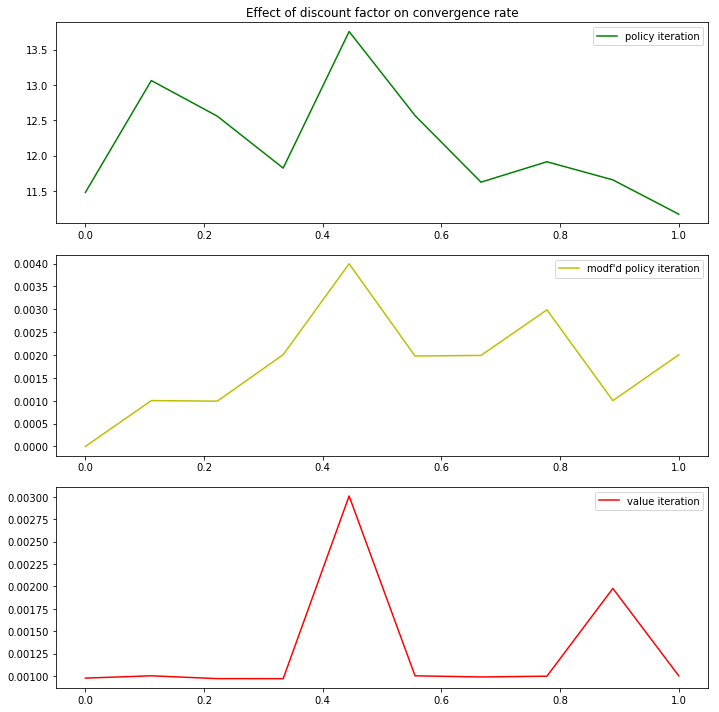

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=False, sharey=False, figsize=(10, 10))
ax1.plot(discount_factors, times_policyiteration, label = 'policy iteration', color='g')
ax1.set_title('Effect of discount factor on convergence rate')
ax1.legend()
ax2.plot(discount_factors, times_modifiedpolicyiteration, label = "modf'd policy iteration", color='y')
ax2.legend()
ax3.plot(discount_factors, times_valueiteration, label='value iteration', color='r')
ax3.legend()
plt.tight_layout()
plt.show()

The discount factor does not seem to affect the convergence rate very much in this case. This is likely because the gridworld toy problem I chose is too small to notice any difference. The fluctations shown in the graphs above are likely do to inconsistencies in the computation times of my personal computer. However, we proved above that the Bellman optimality equation is a contraction mapping and therefore, by the contraction mapping theorem, converges to a unique fixed point at a rate of $\gamma$, for a $0 \leq \gamma < 1$. In a larger problem, a larger discount factor approaching 1 should increase the rate at which the algorithms converge. 